In [1]:
import pandas as pd

# Loading dataset
ind_df = pd.read_csv('data/indigenous_collection.csv', index_col='id')
print(f'Dataframe columns: \n{ind_df.columns}')

Dataframe columns: 
Index(['url', 'thumbnail', 'creation_date', 'modification_date',
       'numero_do_item', 'tripticos', 'categoria', 'nome_do_item',
       'nome_do_item_dic', 'colecao', 'coletor', 'doador', 'modo_de_aquisicao',
       'data_de_aquisicao', 'ano_de_aquisicao', 'data_de_confeccao', 'autoria',
       'nome_etnico', 'descricao', 'dimensoes', 'funcao', 'materia_prima',
       'tecnica_confeccao', 'descritor_tematico', 'descritor_comum',
       'numero_de_pecas', 'itens_relacionados', 'responsavel_guarda',
       'inst_detentora', 'povo', 'autoidentificacao', 'lingua',
       'estado_de_origem', 'geolocalizacao', 'pais_de_origem', 'exposicao',
       'referencias', 'disponibilidade', 'qualificacao', 'historia_adm',
       'notas_gerais', 'observacao', 'conservacao', 'image_path'],
      dtype='object')


## Transforming Images

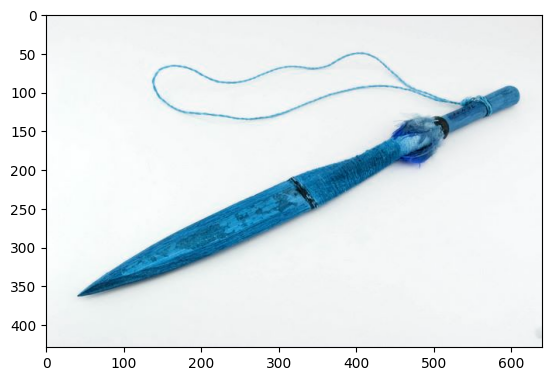

In [9]:
import matplotlib.pyplot as plt
import cv2

# Visualizing first image
plt.imshow(cv2.imread(ind_df['image_path'].loc[55663]))

In [27]:
from tqdm import tqdm
import scipy as scp
import numpy as np

# Extracting height and width information from entire dataset for later processing
dimensions = {'height': [], 'width': []}
for index, value in tqdm(ind_df['image_path'].dropna().items(), total=len(ind_df['image_path'].dropna()), desc='Reading images'):
    try:
        image = cv2.imread(value)
        dimensions['height'].append(image.shape[0])
        dimensions['width'].append(image.shape[1])
    except:
        print('Corrupted image: {}'.format(value))

print('''\nStatistics on height of images: \n{}
quantiles (0.25, 0.50, 0.75, 0.90) = {}, {}, {}, {}'''.format(scp.stats.describe(dimensions['height']), \
                                                              np.quantile(dimensions['height'], 0.25), \
                                                              np.quantile(dimensions['height'], 0.50), \
                                                              np.quantile(dimensions['height'], 0.75), \
                                                              np.quantile(dimensions['height'], 0.90)))
print('''\nStatistics on width of images: \n{}
quantiles (0.25, 0.50, 0.75, 0.90) = {}, {}, {}, {}'''.format(scp.stats.describe(dimensions['width']), \
                                                              np.quantile(dimensions['width'], 0.25), \
                                                              np.quantile(dimensions['width'], 0.50), \
                                                              np.quantile(dimensions['width'], 0.75), \
                                                              np.quantile(dimensions['width'], 0.90)))

Reading images:  76%|▊| 8590/11275 [00:12<00:06, 405.72i

Corrupted image: data/images/297991.jpg


Reading images: 100%|█| 11275/11275 [00:15<00:00, 716.90


Statistics on height of images: 
DescribeResult(nobs=11274, minmax=(np.int64(61), np.int64(6048)), mean=np.float64(466.45148128437114), variance=np.float64(60953.54457200945), skewness=np.float64(7.484553414967672), kurtosis=np.float64(150.98498710438355))
quantiles (0.25, 0.50, 0.75, 0.90) = 427.0, 427.0, 640.0, 683.0

Statistics on width of images: 
DescribeResult(nobs=11274, minmax=(np.int64(64), np.int64(6048)), mean=np.float64(625.7381585949973), variance=np.float64(100110.08755825178), skewness=np.float64(2.714842096746476), kurtosis=np.float64(41.73358208005902))
quantiles (0.25, 0.50, 0.75, 0.90) = 427.0, 640.0, 640.0, 1024.0


In [3]:
import torch
from transformers import pipeline

# Transforming images

# Removing backgroung
seg_pipe = pipeline('semantic-segmentation', model='briaai/RMBG-1.4')


True